In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
#warnings
import warnings
warnings.filterwarnings('ignore')

#***Load the Dataset:-***

In [168]:
#load the dataset
df=pd.read_csv("/content/Quality_of_Life.csv")

In [169]:
df.head()

,country,Purchasing Power Value,Purchasing Power Category,Safety Value,Safety Category,Health Care Value,Health Care Category,Climate Value,Climate Category,Cost of Living Value,Cost of Living Category,Property Price to Income Value,Property Price to Income Category,Traffic Commute Time Value,Traffic Commute Time Category,Pollution Value,Pollution Category,Quality of Life Value,Quality of Life Category
0,Afghanistan,32.15,'Very Low',25.33,'Low',24.24,'Low',0.00,NaN,21.08,'Very Low',7.8,'Low',56.17,'Very High',84.44,'Very High',0.0,NaN
1,Aland Islands,125.01,'Very High',71.81,'High',79.72,'High',0.00,NaN,53.44,'Low',5.33,'Low',19.05,'Very Low',18.05,'Very Low',0.0,NaN
2,Albania,42.82,'Low',55.52,'Moderate',48.21,'Moderate',86.43,'Very High',40.85,'Low',14.88,'High',36.74,'Moderate',77.25,'High',': 104.16','Low'
3,Alderney,0.00,NaN,83.79,'Very High',100.00,'Very High',0.00,NaN,0.00,NaN,0.0,NaN,5.00,'Very Low',1.72,'Very Low',0.0,NaN
4,Algeria,27.60,'Very Low',47.54,'Moderate',54.43,'Moderate',94.82,'Very High',25.31,'Very Low',21.7,'Very High',45.09,'High',63.87,'High',': 98.83','Very Low'


In [170]:
#shape of dataset
df.shape

(236, 19)

#***Understanding the Dataset:-***

In [171]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   country                            236 non-null    object 
 1   Purchasing Power Value             236 non-null    float64
 2   Purchasing Power Category          190 non-null    object 
 3   Safety Value                       236 non-null    float64
 4   Safety Category                    234 non-null    object 
 5   Health Care Value                  236 non-null    float64
 6   Health Care Category               221 non-null    object 
 7   Climate Value                      236 non-null    float64
 8   Climate Category                   114 non-null    object 
 9   Cost of Living Value               236 non-null    float64
 10  Cost of Living Category            191 non-null    object 
 11  Property Price to Income Value     236 non-null    object 

In [172]:
#data description
df.describe()

,Purchasing Power Value,Safety Value,Health Care Value,Climate Value,Cost of Living Value,Traffic Commute Time Value,Pollution Value
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,55.573305,55.274449,54.731568,37.598178,37.526314,28.492966,54.266186
std,52.008245,16.914298,20.607381,40.851542,26.026565,17.347242,25.853695
min,0.000000,0.000000,0.000000,-3.540000,0.000000,0.000000,0.000000
25%,16.340000,43.857500,45.807500,0.000000,24.550000,17.100000,35.700000
50%,42.930000,54.635000,57.150000,0.000000,36.895000,29.845000,59.765000
75%,85.940000,68.132500,68.447500,79.332500,51.090000,38.870000,73.740000
max,281.830000,100.000000,100.000000,99.890000,137.370000,100.000000,106.900000


In [173]:
#drop the country columns
df.drop(columns=['country'],inplace=True)

#***Handling Missing vales:-***

In [174]:
#check the null vales columns
df.isnull().sum()

,0
Purchasing Power Value,0
Purchasing Power Category,46
Safety Value,0
Safety Category,2
Health Care Value,0
Health Care Category,15
Climate Value,0
Climate Category,122
Cost of Living Value,0
Cost of Living Category,45


In [175]:
# Mode imputation for columns with fewer missing values
columns_with_few_missing = ['Purchasing Power Category', 'Safety Category', 'Health Care Category',
                            'Cost of Living Category', 'Property Price to Income Category',
                            'Traffic Commute Time Category', 'Pollution Category']

for col in columns_with_few_missing:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Placeholder imputation for columns with many missing values
columns_with_many_missing = ['Climate Category', 'Quality of Life Category']
for col in columns_with_many_missing:
    df[col].fillna('Not Available', inplace=True)

# Check again for null values
print(df.isnull().sum())

Purchasing Power Value               0
Purchasing Power Category            0
Safety Value                         0
Safety Category                      0
Health Care Value                    0
Health Care Category                 0
Climate Value                        0
Climate Category                     0
Cost of Living Value                 0
Cost of Living Category              0
Property Price to Income Value       0
Property Price to Income Category    0
Traffic Commute Time Value           0
Traffic Commute Time Category        0
Pollution Value                      0
Pollution Category                   0
Quality of Life Value                0
Quality of Life Category             0
dtype: int64


In [176]:
#duplicate check rows
df.duplicated().sum()

0

In [177]:
# Convert columns to numeric, handling errors by converting invalid parsing to NaN
numeric_columns = ["Property Price to Income Value", "Quality of Life Value"]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].str.replace(":", "").str.replace("'", "").str.replace(",",""), errors='coerce')


In [178]:
num_col=df.select_dtypes(include=np.number).columns
num_col

Index(['Purchasing Power Value', 'Safety Value', 'Health Care Value',
       'Climate Value', 'Cost of Living Value',
       'Property Price to Income Value', 'Traffic Commute Time Value',
       'Pollution Value', 'Quality of Life Value'],
      dtype='object')

In [179]:
cat_col=df.select_dtypes(include='object').columns
cat_col

Index(['Purchasing Power Category', 'Safety Category', 'Health Care Category',
       'Climate Category', 'Cost of Living Category',
       'Property Price to Income Category', 'Traffic Commute Time Category',
       'Pollution Category', 'Quality of Life Category'],
      dtype='object')

#***Data Visualization:-***

In [180]:
df.columns

Index(['Purchasing Power Value', 'Purchasing Power Category', 'Safety Value',
       'Safety Category', 'Health Care Value', 'Health Care Category',
       'Climate Value', 'Climate Category', 'Cost of Living Value',
       'Cost of Living Category', 'Property Price to Income Value',
       'Property Price to Income Category', 'Traffic Commute Time Value',
       'Traffic Commute Time Category', 'Pollution Value',
       'Pollution Category', 'Quality of Life Value',
       'Quality of Life Category'],
      dtype='object')

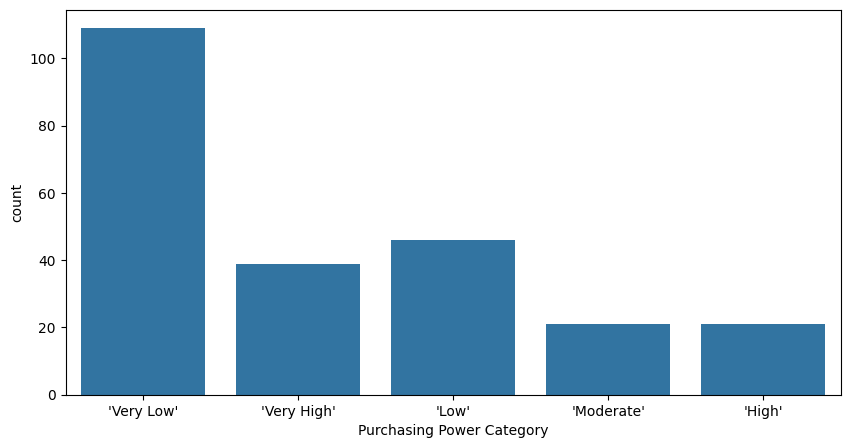

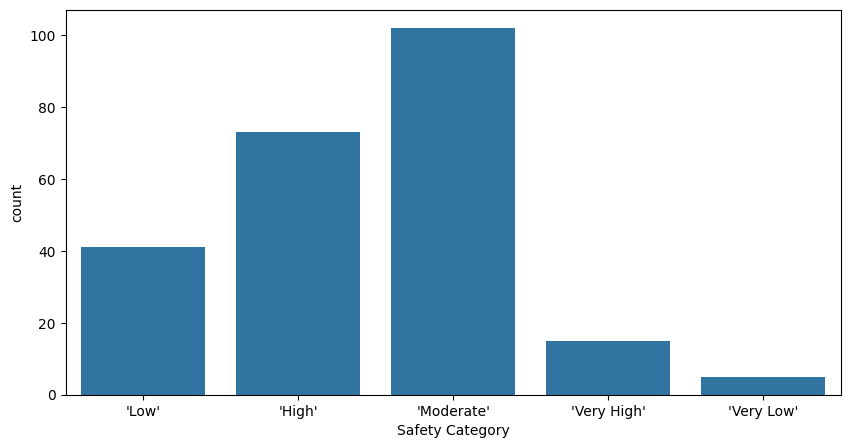

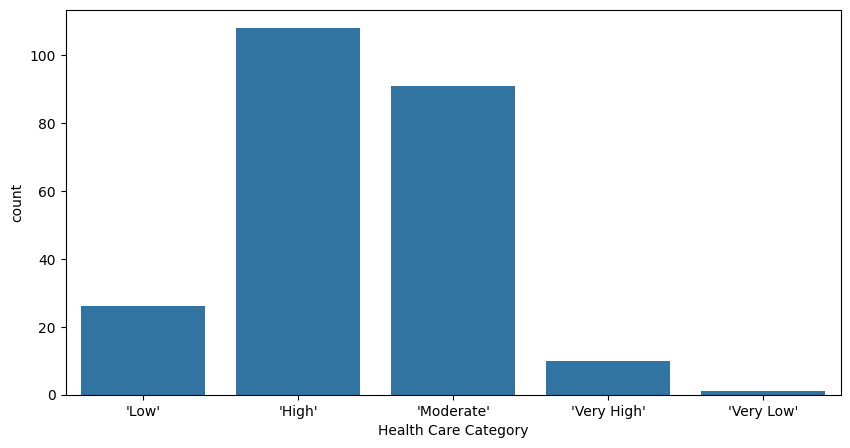

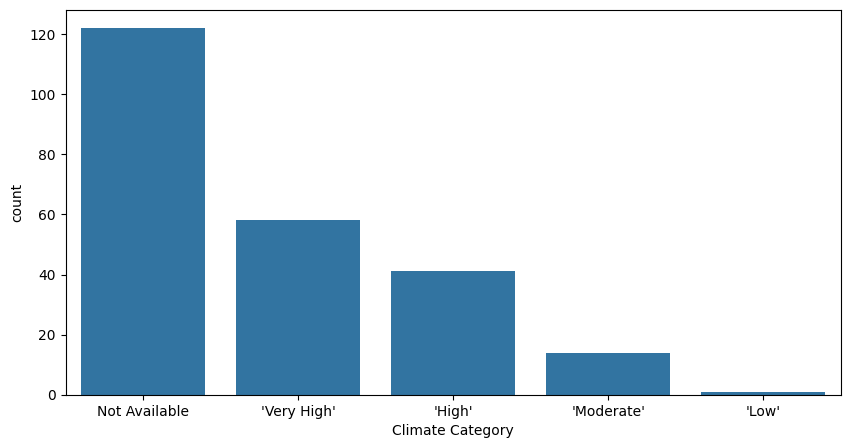

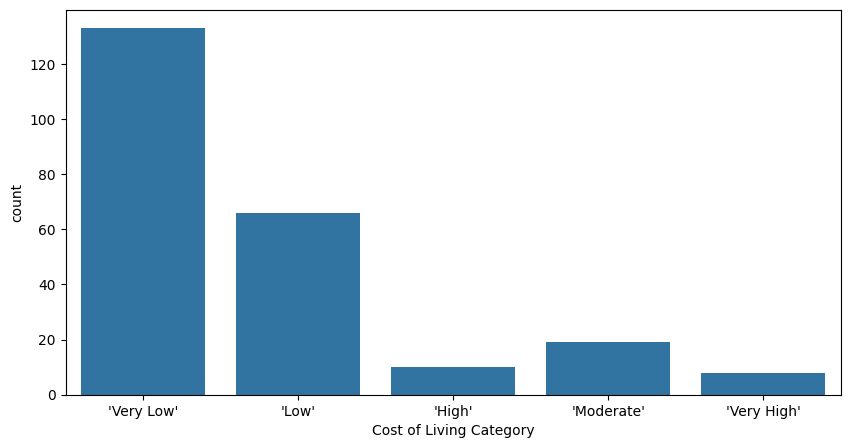

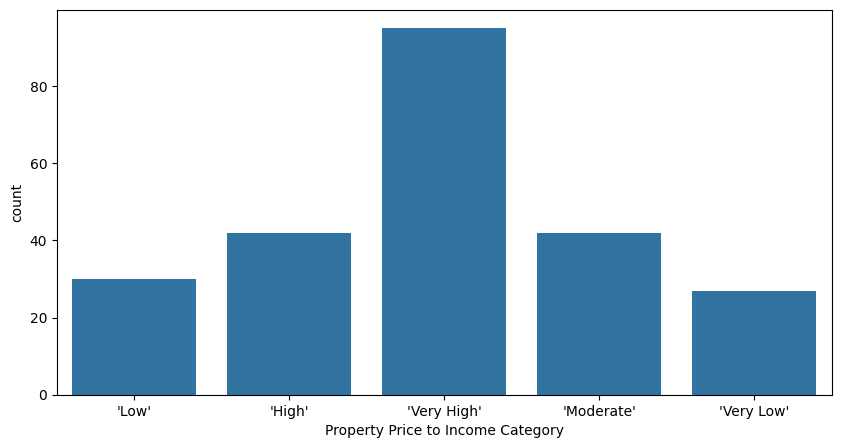

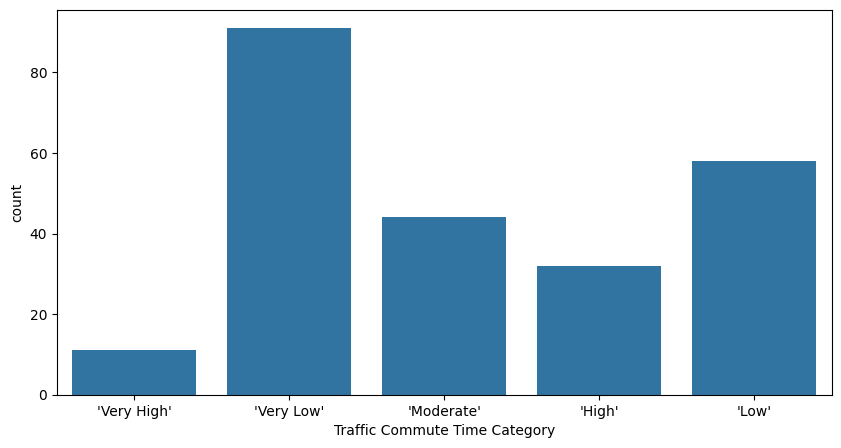

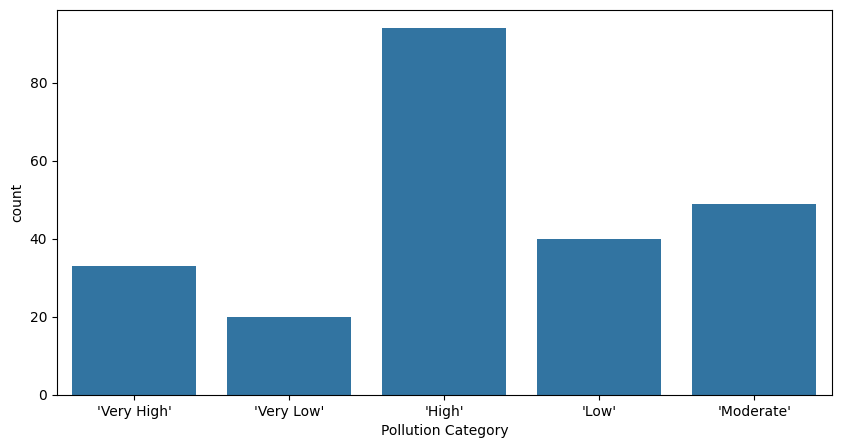

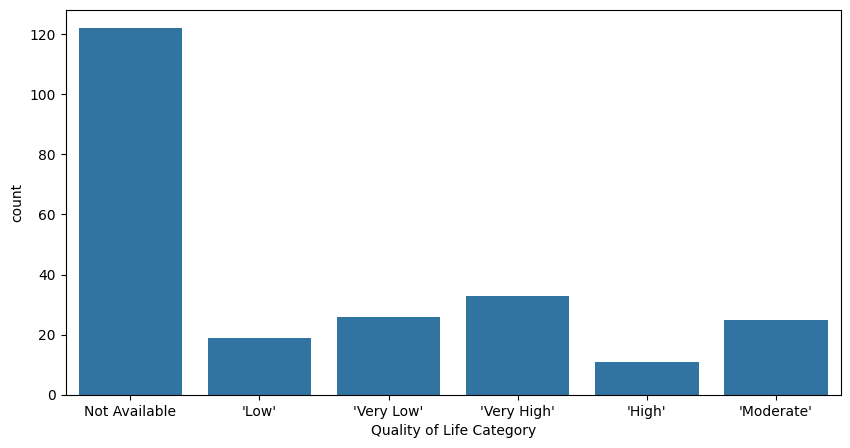

In [181]:
#all categorical columns bar chart visualization
for col in cat_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x=col,data=df)
  plt.show()

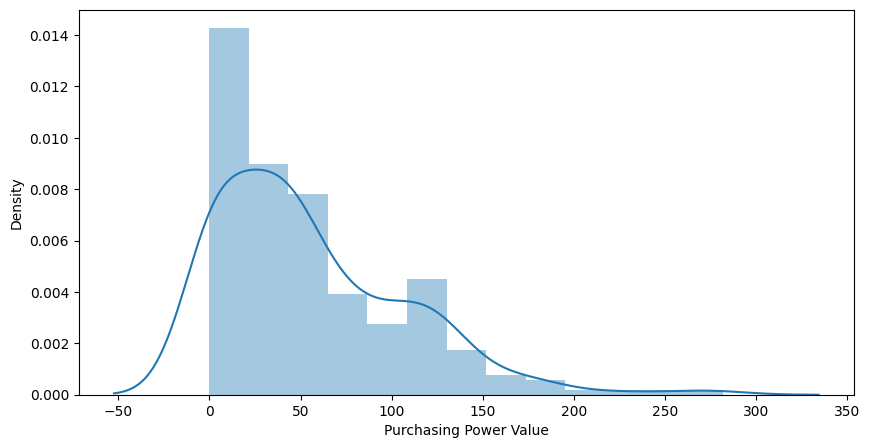

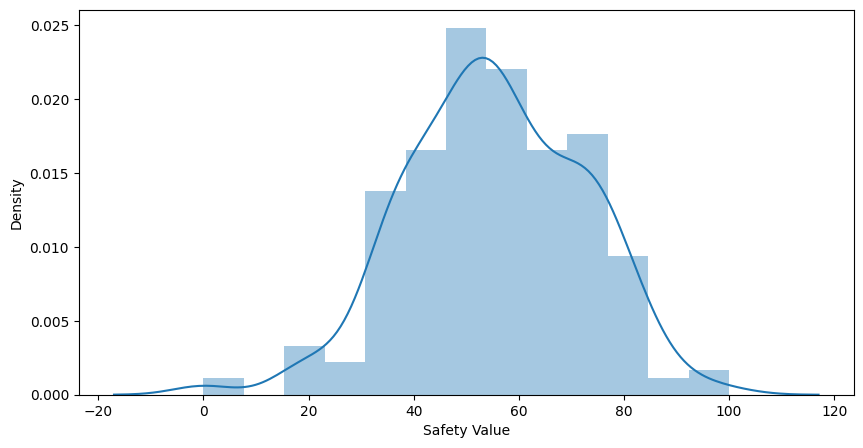

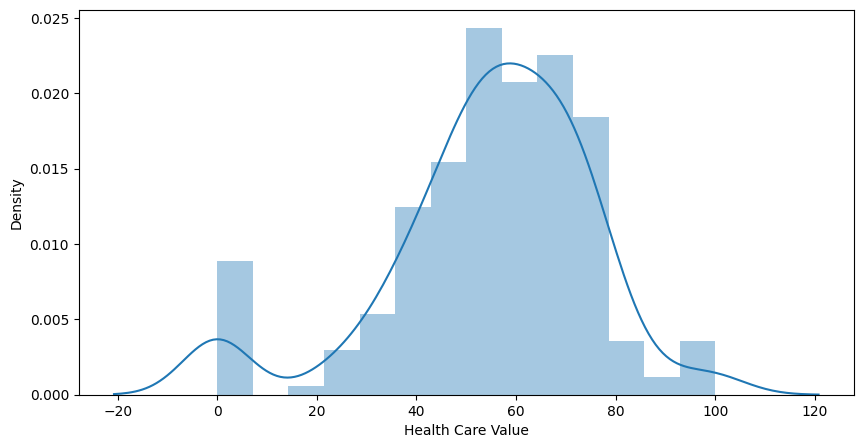

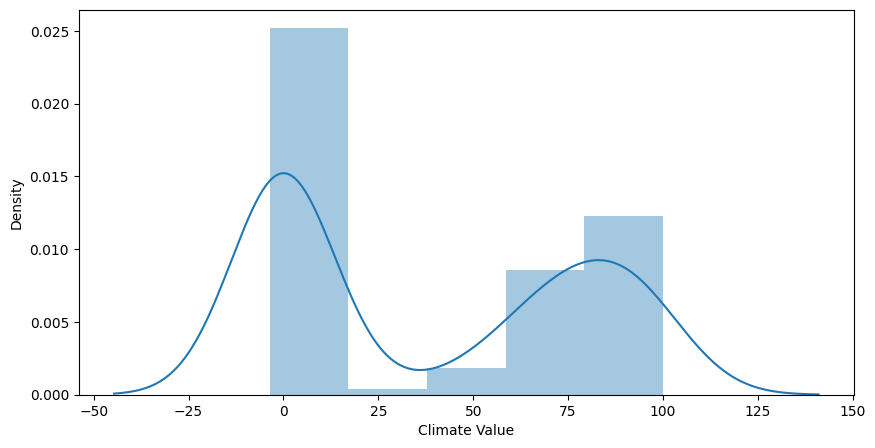

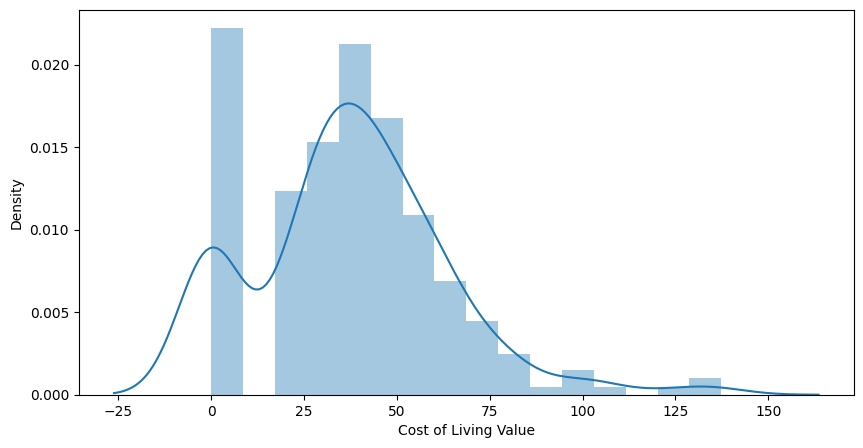

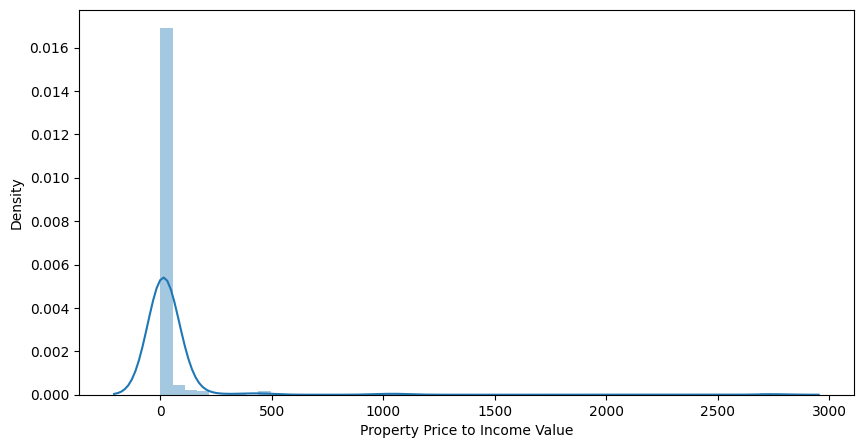

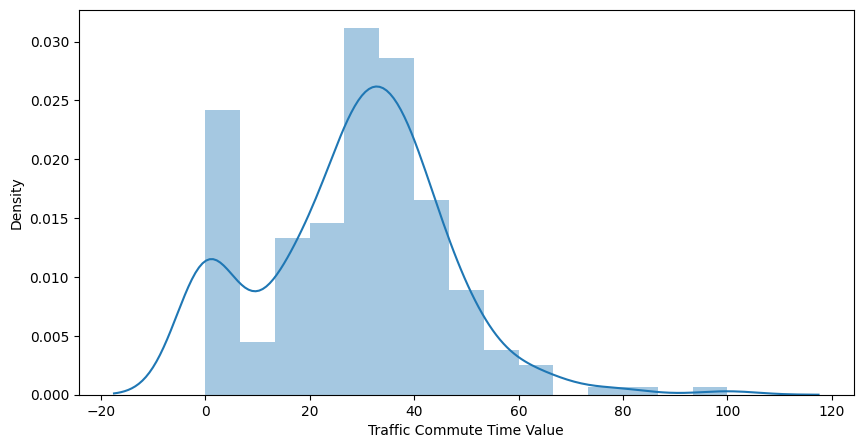

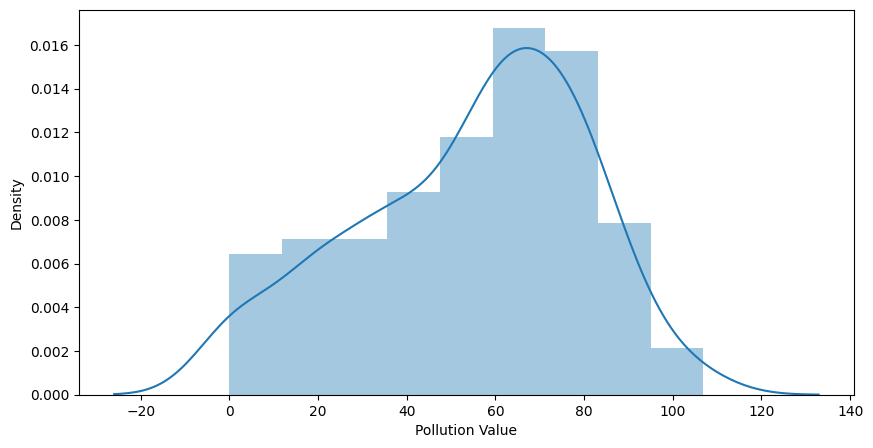

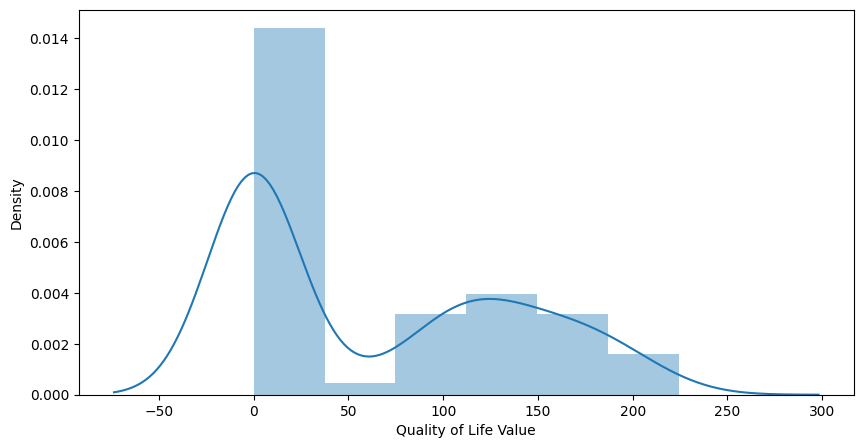

In [182]:
#all numerical column distribution chart
for col in num_col:
  plt.figure(figsize=(10,5))
  sns.distplot(df[col])
  plt.show()

In [183]:
#copy the datsset
df2=df.copy()

#***Label Encoding for categories:-***

In [184]:
#Label encoding the categorical columns
lb=LabelEncoder()
for col in cat_col:
  df2[col]=lb.fit_transform(df[col])

#***correlation heatmap:-***

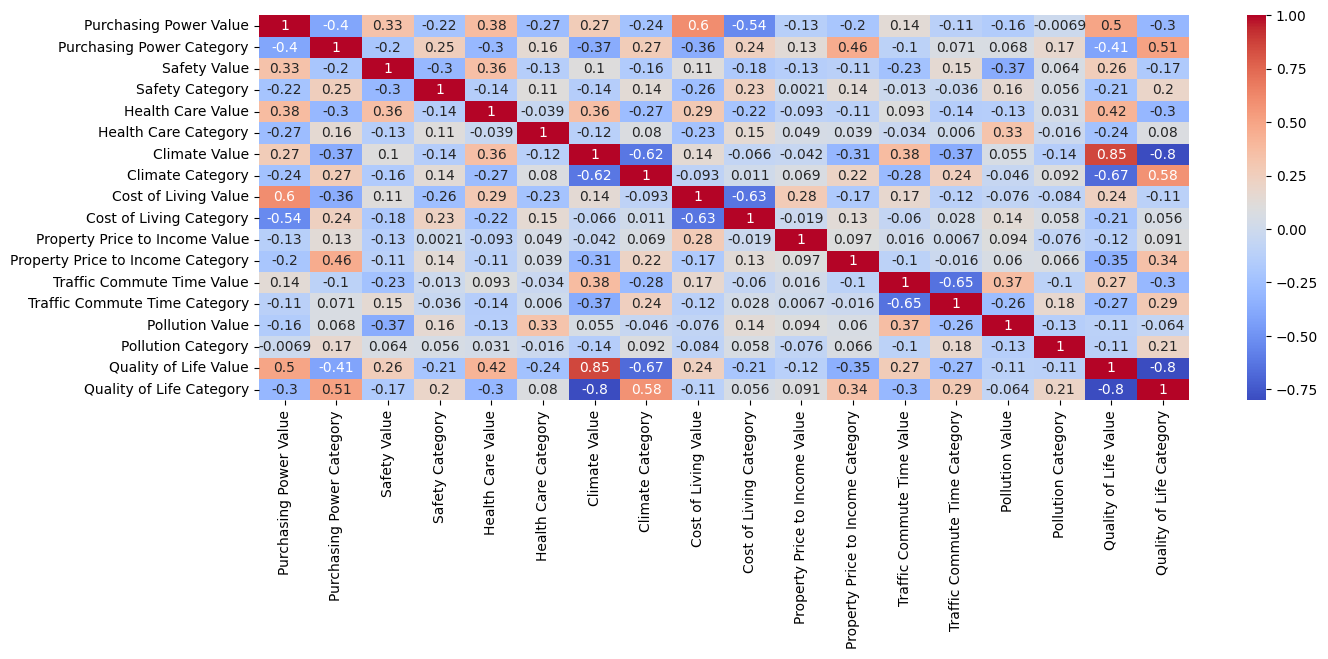

In [185]:
#correlation heartmap
plt.figure(figsize=(15,5))
sns.heatmap(df2.corr(),annot=True,cmap='coolwarm')
plt.show()

In [186]:
# Define categorical and numerical columns
categorical_columns = [col for col in df.columns if 'Category' in col]
numerical_columns = [col for col in df.columns if col not in categorical_columns + ['Quality of Life Value']]


#**`Process for pipline:-`**

In [187]:
# Define a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Scale numerical data
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)  # Encode categorical data
    ]
)

#***spliting the dataset:-***

In [188]:
X=df.drop('Quality of Life Value',axis=1)
y=df['Quality of Life Value']

In [189]:
#spliting the datset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#***Building the Model using Pipeline":-***

In [190]:
# Create a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())  # Regression model
])

In [191]:
# Train the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Purchasing Power Value',
                                                   'Safety Value',
                                                   'Health Care Value',
                                                   'Climate Value',
                                                   'Cost of Living Value',
                                                   'Property Price to Income '
                                                   'Value',
                                                   'Traffic Commute Time Value',
                                                   'Pollution Value']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Purchasing Power Category',
                                                   'Safety Category',
                                                   'Health Care Category',
                                                   'Climate Category',
                                                   'Cost of Living Category',
                                                   'Property Price to Income '
                                                   'Category',
                                                   'Traffic Commute Time '
                                                   'Category',
                                                   'Pollution Category',
                                                   'Quality of Life '
                                                   'Category'])])),
                ('regressor', LinearRegression())])

In [192]:
# Make predictions
y_pred = pipeline.predict(X_test)

#**`Evaluate the model performances:-`**

In [193]:
print("\nRegression Model Performance:")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")


Regression Model Performance:
MSE: 131.41
R2 Score: 0.98


#**`cross validate the model:-`**

In [197]:
# Perform k-fold cross-validation
k = 5  # Number of folds
cv_scores = cross_val_score(pipeline, X, y, cv=k, scoring='r2')  # Scoring based on R²

# Print results
print(f"Cross-Validation Results:")
print(f"R² Scores for each fold: {cv_scores}")
print(f"Mean R² Score: {np.mean(cv_scores):.2f}")
print(f"Standard Deviation of R² Scores: {np.std(cv_scores):.2f}")


Cross-Validation Results:
R² Scores for each fold: [0.98219562 0.9734203  0.96638923 0.91705165 0.95263429]
Mean R² Score: 0.96
Standard Deviation of R² Scores: 0.02


#***save the model :-***

In [196]:
#save the model in piickkle
import pickle
with open('pipeline_model.pkl','wb') as f:
  pickle.dump(pipeline,f)
  print("pipeline Model save sucessfully")

pipeline Model save sucessfully
